### 1. Plot a bar chart showing count of individual species?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/akshatrastogi/Desktop/Fish_dataset.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
s = df['Species'].value_counts()
s

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Number for each Species'}>

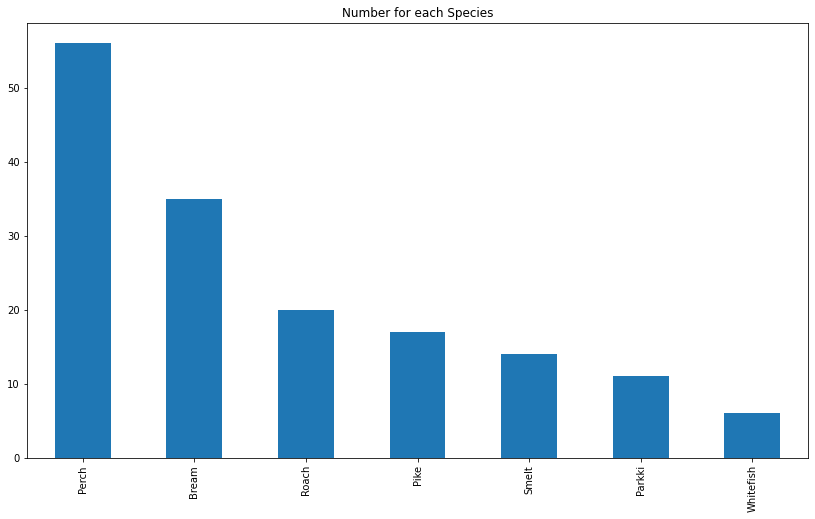

In [8]:
df['Species'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Species")

### 2. Identify outliers and remove if any?

In [6]:
import seaborn as sns

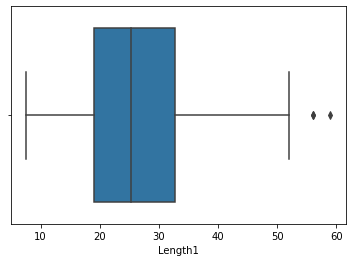

In [7]:
sns.boxplot(df.Length1)

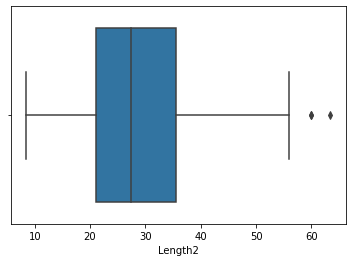

In [8]:
sns.boxplot(df.Length2)

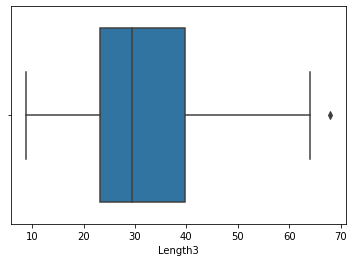

In [9]:
sns.boxplot(df.Length3)

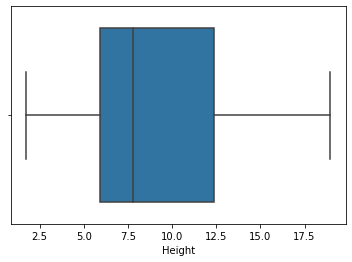

In [10]:
sns.boxplot(df.Height)

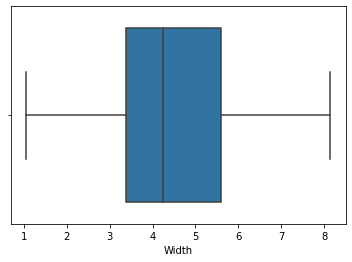

In [11]:
sns.boxplot(df.Width)

In [12]:
# Handling Outliers | I am capping that with Var > P95 then Var = P95 [Upper CAP]
#                                         Var < P05 then Var = P05 [Lower CAP]
#_________________________________________________________________________________
df['Length1'] = df['Length1'].clip(upper=df['Length1'].quantile(0.95)) 
df['Length1']= df['Length1'].clip(lower=df['Length1'].quantile(0.05))

df['Length2'] = df['Length2'].clip(upper=df['Length2'].quantile(0.95)) 
df['Length2']= df['Length2'].clip(lower=df['Length2'].quantile(0.05))

df['Length3'] = df['Length3'].clip(upper=df['Length3'].quantile(0.95)) 
df['Length3']= df['Length3'].clip(lower=df['Length3'].quantile(0.05))

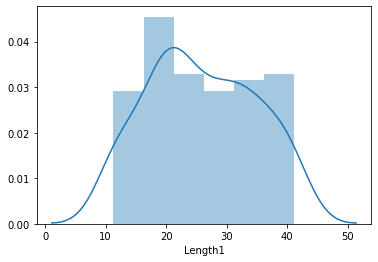

In [13]:
#Checking Normality
sns.distplot(df.Length1)

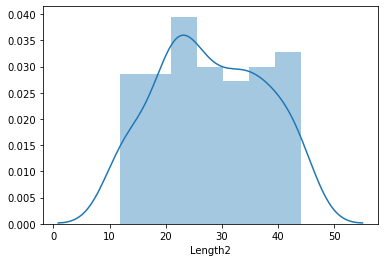

In [14]:
sns.distplot(df.Length2) #Checking Normality

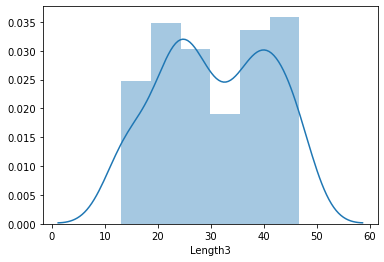

In [15]:
sns.distplot(df.Length3) #Checking Normality

### 3. Build a regression model and print regression equation?

# MULTIPLE LINEAR REGRESSION MODEL

In [16]:
import statsmodels.formula.api as smf

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

In [18]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [19]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [20]:
from sklearn import metrics

In [21]:
lm = smf.ols( 'Weight ~ Species + Height + Width + Length1 + Length2 + Length3', df ).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           3.41e-59
Time:                        19:59:01   Log-Likelihood:                -1011.2
No. Observations:                 159   AIC:                             2036.
Df Residuals:                     152   BIC:                             2058.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -603.3143     56.946    -10.594      0.000    -715.823    -490.805
Species       30.5858     10.887      2.809      0.006       9.077      52.095
Height        51.8998     12.508      4.149      0.000      27.187      76.612
Width         35.5888     26.265      1.355      0.177     -16.302      87.480
Length1      130.5130     47.906      2.724      0.007      35.865     225.161
Length2      -47.0416     51.085     -0.921      0.359    -147.969      53.886
Length3      -56.8369     21.598     -2.632      0.009     -99.508     -14.166
==============================================================================
Omnibus:                      108.866   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.727
Skew:                           2.441   Prob(JB):                    6.28e-194
Kurtosis:                      13.510   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm = smf.ols( 'Weight ~ Species + Height + Length1 + Length3', df ).fit()

In [24]:
lm.summary()
#after removing length2 and width we can see that the f-statistic has been increased and thereby increasing the accuracy of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     208.7
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           4.35e-61
Time:                        19:59:06   Log-Likelihood:                -1012.3
No. Observations:                 159   AIC:                             2035.
Df Residuals:                     154   BIC:                             2050.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.7273     53.283    -11.762      0.000    -731.988    -521.467
Species       37.0283      9.832      3.766      0.000      17.604      56.452
Height        64.0612      8.364      7.660      0.000      47.539      80.583
Length1      106.7608     16.038      6.657      0.000      75.077     138.444
Length3      -77.8182     15.649     -4.973      0.000    -108.732     -46.904
==============================================================================
Omnibus:                      106.396   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.935
Skew:                           2.374   Prob(JB):                    1.01e-185
Kurtosis:                      13.298   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lm.params

Intercept   -626.727323
Species       37.028303
Height        64.061176
Length1      106.760774
Length3      -77.818214
dtype: float64

In [26]:
lm.pvalues

Intercept    3.400450e-23
Species      2.356667e-04
Height       1.932287e-12
Length1      4.648025e-10
Length3      1.742769e-06
dtype: float64

In [27]:
#removing width and length2 as they very high pvalue as compared to others
lm = smf.ols( 'Weight ~ Species + Height + Length1 + Length3', df ).fit()

In [28]:
lm.params

Intercept   -626.727323
Species       37.028303
Height        64.061176
Length1      106.760774
Length3      -77.818214
dtype: float64

In [29]:
lm.pvalues

Intercept    3.400450e-23
Species      2.356667e-04
Height       1.932287e-12
Length1      4.648025e-10
Length3      1.742769e-06
dtype: float64

In [30]:
#lmpredict is the the predicted weight
lmpredict = lm.predict( {'Species': df.Species, 'Height':df.Height, 'Length1': df.Length1, 'Length3':df.Length3 } )

In [31]:
#taking mean square error of orginal and predicted weight
mse = metrics.mean_squared_error( df.Weight, lmpredict )
rmse = np.sqrt( mse )
rmse

140.83672612718664

In [32]:
#taking mean absolute error of orginal and predicted weight
metrics.mean_absolute_error(df.Weight, lmpredict)

93.4159731153175

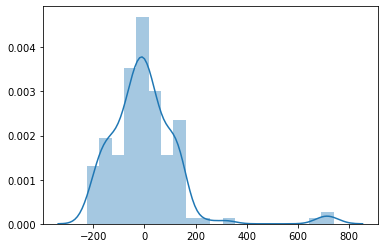

In [33]:
#plot of the residuals
sns.distplot(lm.resid)

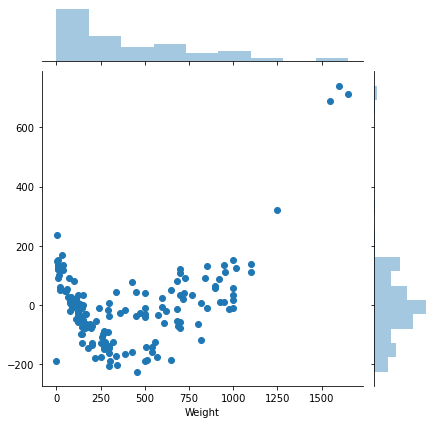

In [34]:
#plot of residual vs original weight
sns.jointplot(df.Weight, lm.resid)

# USING SKLEARN LIB TO BUILD MODEL

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
  df[["Species", "Height", "Width", "Length1", "Length2", "Length3"]],
  df.Weight,
  test_size=0.3,
  random_state = 101 )

In [38]:
print (X_train)
print (X_test)

     Species   Height   Width  Length1  Length2  Length3
65         1   8.8928  3.2928     18.4     20.0     22.4
100        2   6.5610  4.2390     23.5     25.6     27.0
67         1   9.3960  3.4104     19.0     20.7     23.2
21         0  15.9936  5.3704     31.4     34.0     39.2
22         0  15.5227  5.2801     31.5     34.5     39.7
..       ...      ...     ...      ...      ...      ...
63         1   7.4052  2.6730     16.3     17.7     19.8
70         1  11.0880  4.1440     23.0     25.0     28.0
81         2   5.0820  2.7720     18.2     20.0     21.0
11         0  14.3714  4.8146     28.7     31.0     36.2
95         2   6.2750  3.7250     21.5     23.5     25.0

[111 rows x 6 columns]
     Species   Height   Width  Length1  Length2  Length3
127        2  12.4888  7.5958    41.10     44.0    46.60
42         4   6.1146  3.2943    19.40     21.0    23.70
55         6   8.3804  4.2476    23.60     26.0    28.70
101        2   7.1680  4.1440    25.00     26.5    28.00
33     

In [39]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [40]:
linreg.coef_

array([ 22.4572115 ,  43.62099749,  68.86150176, 149.68275911,
       -87.19317416, -40.56159596])

In [41]:
#Calculating root mean square error on testing data
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

181.49240942447287

In [42]:
#Calculating root mean square error on training error
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

120.7535886478853

In [43]:
#Calculating root mean square on training data
metrics.r2_score( y_train, y_pred_t )

0.8732363470803735

In [44]:
#Calculating root mean square on testing data
metrics.r2_score( y_test, y_pred )

0.7874294356968787

In [45]:
list( zip( ["Species", "Height", "Width", "Length1", "Length2", "Length3"], list( linreg.coef_ ) ) )

[('Species', 22.457211496821117),
 ('Height', 43.62099748983578),
 ('Width', 68.86150176141744),
 ('Length1', 149.68275911265522),
 ('Length2', -87.19317415701884),
 ('Length3', -40.56159596271215)]

In [46]:
#calculating residuals or error between testing and predicted data
residuals = y_test - y_pred

ValueError: operands could not be broadcast together with shapes (159,) (48,) 

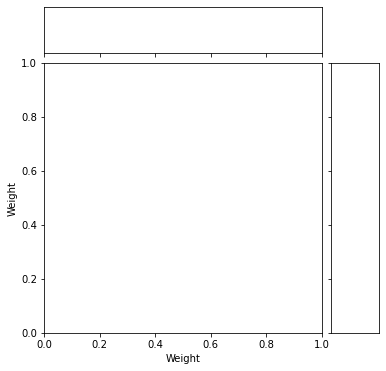

In [47]:
#plot of original weight and residual data
sns.jointplot(df.Weight, residuals)

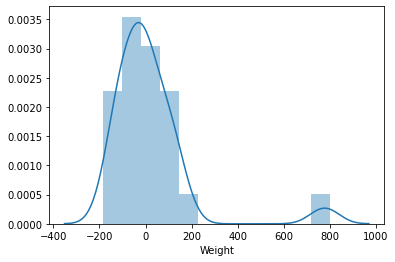

In [48]:
#plot of residuals
sns.distplot( residuals )

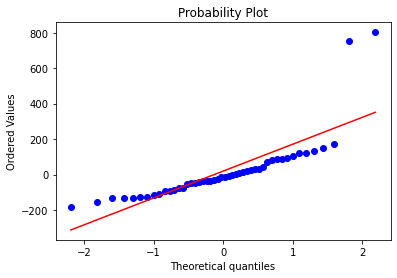

In [49]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

### 4. What is the mean score of the model at  95% confidence interval?

In [50]:
#Taking only 95% confidence interval
df = df.clip(upper=df.quantile(0.95), axis=1) 
df = df.clip(lower=df.quantile(0.05), axis=1)



In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
  df[["Species", "Height", "Width", "Length1", "Length2", "Length3"]],
  df.Weight,
  test_size=0.3,
  random_state = 101 )

In [53]:
print (X_train)
print (X_test)

     Species   Height   Width  Length1  Length2  Length3
65         1   8.8928  3.2928     18.4     20.0     22.4
100        2   6.5610  4.2390     23.5     25.6     27.0
67         1   9.3960  3.4104     19.0     20.7     23.2
21         0  15.9936  5.3704     31.4     34.0     39.2
22         0  15.5227  5.2801     31.5     34.5     39.7
..       ...      ...     ...      ...      ...      ...
63         1   7.4052  2.6730     16.3     17.7     19.8
70         1  11.0880  4.1440     23.0     25.0     28.0
81         2   5.0820  2.7720     18.2     20.0     21.0
11         0  14.3714  4.8146     28.7     31.0     36.2
95         2   6.2750  3.7250     21.5     23.5     25.0

[111 rows x 6 columns]
     Species    Height    Width  Length1  Length2  Length3
127        2  12.48880  7.28462   41.100    44.00   46.600
42         4   6.11460  3.29430   19.400    21.00   23.700
55         5   8.38040  4.24760   23.600    26.00   28.700
101        2   7.16800  4.14400   25.000    26.50   28.0

In [54]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [55]:
linreg.coef_

array([ 26.74441366,  45.04052997,  54.03638202,  93.02775664,
       -39.07556451, -35.40485916])

In [56]:
#Calculating root mean square error on testing data
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

102.02503924242177

In [57]:
#Calculating root mean square error on training error
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

93.86932480994057

In [58]:
#Calculating root mean square on training data
metrics.r2_score( y_train, y_pred_t )

0.9104162429936956

In [59]:
#Calculating root mean square on testing data
metrics.r2_score( y_test, y_pred )

0.9058279599545092

### 5. Compare real and predicted weights and give a conclusion statement based on it?

In [60]:
#calculating residuals or error between testing and predicted data
residuals = y_test - y_pred

ValueError: operands could not be broadcast together with shapes (159,) (48,) 

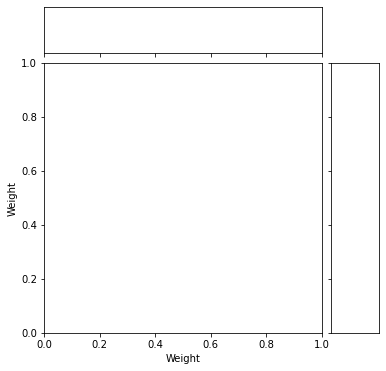

In [61]:
#plot of original weight and residual data
sns.jointplot(df.Weight, residuals)

Here in the above graoh we can see the error/residual between the predicted and the original weight. When the 95% confidence interval is taken we observe that the our predicted model is giving 90% accuracy. 

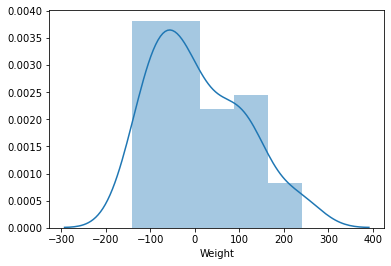

In [62]:
#plot of residuals
sns.distplot( residuals )

We can observe that the error between the original and the predicted weight mostly lies between (-100 - 100) range.

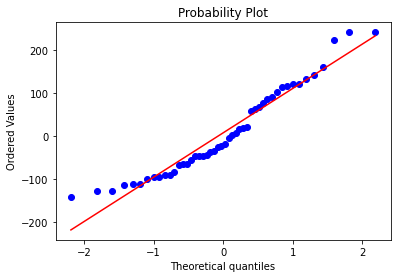

In [63]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()